In [8]:
#initialize essential libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#load data
train_path = '/content/drive/MyDrive/Datasets/Archive/train'
val_path = '/content/drive/MyDrive/Datasets/Archive/val'
test_path = '/content/drive/MyDrive/Datasets/Archive/test'


In [11]:
#set up data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
#set batch size and image dimensions
batch_size = 32
img_height, img_width = 150, 150


In [13]:
#generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
#define the model..
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
#compile the model using suitable parametre
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
#checking the sample and batch size for tranning purpose
print("Number of samples in the training set:", train_generator.samples)
print("Number of samples in the training set:", val_generator.samples)
print("Batch size:", batch_size)

Number of samples in the training set: 5216
Number of samples in the training set: 16
Batch size: 32


In [23]:
#model tranning phase
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)


Epoch 1/10
163/163 [==============================] - 91s 557ms/step - loss: 0.1855 - accuracy: 0.9245 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 90s 553ms/step - loss: 0.1693 - accuracy: 0.9356 - val_loss: 0.8224 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 91s 558ms/step - loss: 0.1576 - accuracy: 0.9398 - val_loss: 0.5005 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 91s 561ms/step - loss: 0.1456 - accuracy: 0.9456 - val_loss: 1.1501 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 92s 563ms/step - loss: 0.1420 - accuracy: 0.9482 - val_loss: 0.2728 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 90s 551ms/step - loss: 0.1319 - accuracy: 0.9502 - val_loss: 0.6597 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 92s 560ms/step - loss: 0.1183 - accuracy: 0.9565 - val_loss: 0.7220 - val_ac

In [24]:
#generate test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


In [25]:
#evaluation with test data
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

#print accuracy of the model on test data
print("test data accuracy: {:.2f}%".format(test_acc * 100))


20/20 [==============================] - 6s 305ms/step - loss: 0.6296 - accuracy: 0.8189
test data accuracy: 81.89%


In [26]:
#prediction on test data
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = (predictions > 0.5).astype(int)

#printing classification report and confusion matrix
print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))
print("Confusion Matrix:\n", confusion_matrix(test_generator.classes, predicted_classes))


20/20 [==============================] - 10s 489ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26       234
           1       0.63      0.80      0.70       390

    accuracy                           0.58       624
   macro avg       0.50      0.50      0.48       624
weighted avg       0.53      0.58      0.54       624

Confusion Matrix:
 [[ 47 187]
 [ 78 312]]


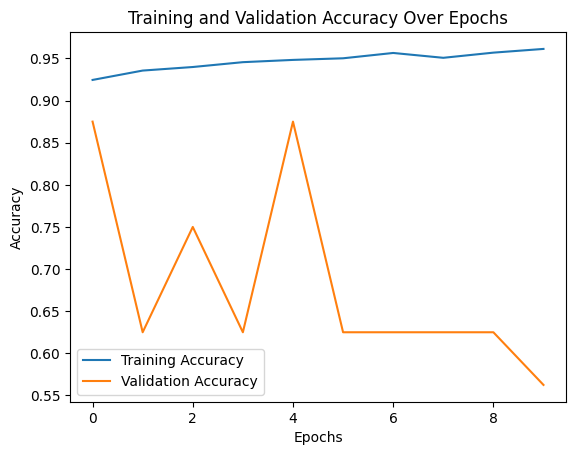

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()
